Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17812.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 17811.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 17744.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 17828.0
Run 4, iteration: 2/100, moves: 0, cost: 17828.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 17906.0
Run 5, iteration: 2/100, moves: 0, cost: 17906.0
Best run was number 3
[[  45.76586544 -111.1851566 ]
 [  45.77292903 -111.1850018 ]
 [  45.6857567  -111.0619905 ]
 [  45.59834    -111.166     ]
 [  45.67663438 -111.0688656 ]
 [  45.72928202 -111.2058522 ]
 [  45.69293179 -111.0462554 ]
 [  45.77113612 -1

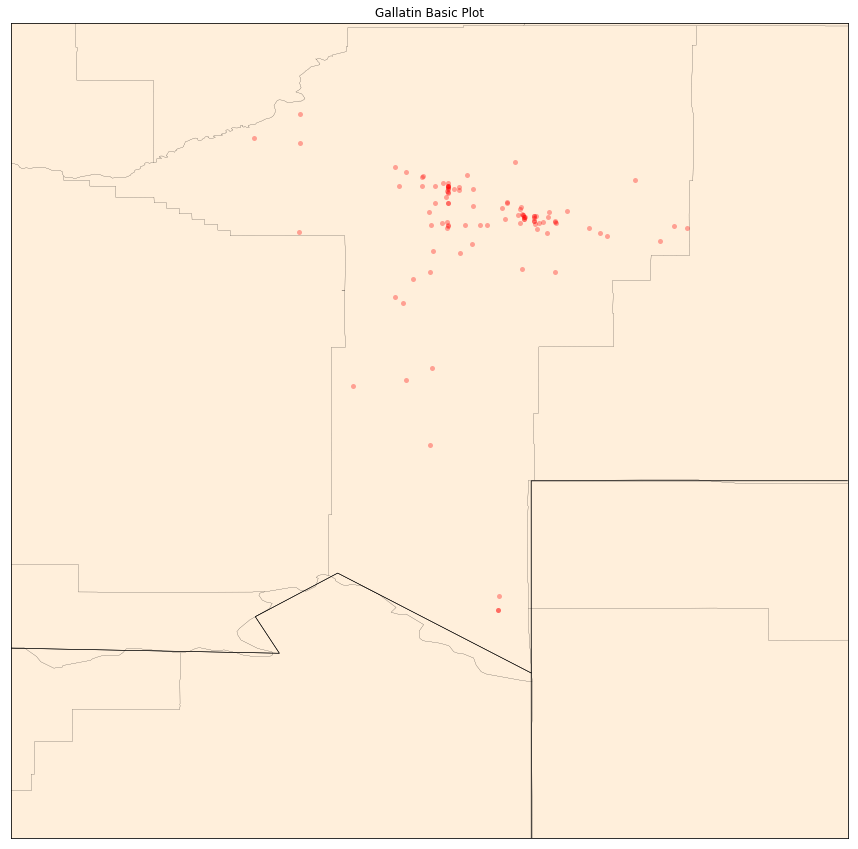

Done


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from pylab import *
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors.kde import KernelDensity
import random
import pandas as pd
import csv

from mpl_toolkits.basemap import Basemap
from kmodes.kmodes import KModes
from __future__ import (absolute_import, division, print_function)


def draw_map_background(m, ax):
    ax.set_facecolor('#729FCF')
    m.fillcontinents(color='#FFEFDB', ax=ax, zorder=0)
    m.drawcounties(ax=ax)
    m.drawstates(ax=ax)
    m.drawcountries(ax=ax)
    m.drawcoastlines(ax=ax)
KM = 1000.
clat = 39.3
clon = -94.7333
wid = 5500 * KM
hgt = 3500 * KM
#m= Basemap(llcrnrlon=-129.098907,llcrnrlat=22.700324,urcrnrlon=-65.553985,urcrnrlat=52.177390,
#             resolution='i', projection='lcc', lat_0 = 37.697948, lon_0 = -97.314835)
#m = Basemap(width=wid, height=hgt, rsphere=(6378137.00,6356752.3142),
#            resolution='i', area_thresh=2500., projection='lcc',
#            lon_0=-110.428794,lat_0=46.998846)
#m  = Basemap(projection='lcc',lon_0=-110.428794,lat_0=46.998846,resolution='f',\
#             llcrnrx=-800*600,llcrnry=-800*400,
#            urcrnrx=+600*900,urcrnry=+450*600)
#For Gallatin
min_lat =  44.06338
max_lat = 46.200085
min_lon = -111.891
max_lon = -110.5396
m = Basemap(lon_0=-111.428794,lat_0=44.998846,llcrnrlat = min_lat, urcrnrlat = max_lat, llcrnrlon = min_lon, urcrnrlon=max_lon, resolution='l', fix_aspect = False)

fig = plt.figure()
ax = fig.add_subplot(111)

county='Gallatin'
lats, lons = [], []
with open('/Users/usmp/Google Drive/Saidur_Matt_Term_Project/'+county+'_alldata.csv') as f:
    reader = csv.reader(f)
    next(reader) # Ignore the header row.
    for row in reader:
        lat = float(row[15])
        lon = float(row[16])
        # filter lat,lons to (approximate) map view:
        lats.append( lat )
        lons.append( lon )
data=[]
# random categorical data
for i in range(len(lats)):
    data.append([lats[i],lons[i]])

#print(data)
km = KModes(n_clusters=100, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

lats, lons = [], []
for i in range(len(km.cluster_centroids_)):
    lats.append(km.cluster_centroids_[i][0])
    lons.append(km.cluster_centroids_[i][1])
# Print the cluster centroids
print(km.cluster_centroids_)
x,y = m(lons, lats)
m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='Red',markeredgecolor="none", alpha=0.33)
draw_map_background(m, ax)
plt.title(county+' Basic Plot')
plt.gcf().set_size_inches(15,15)

plt.show()
#plt.savefig('/Users/usmp/Google Drive/Saidur_Matt_Term_Project/'+county+'CrashData(Basic).jpg')
#plt.close()
print("Done")